In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.datasets import make_spd_matrix # crating positive semidefinite matrix
from numpy.linalg import inv 
from numpy.linalg import det
from sklearn.model_selection import KFold
from sklearn import mixture

In [0]:
def plot(r,r1,r2,r3):
  plt.figure(figsize=(7,7))
  plt.scatter(r[0,:],r[1,:],marker='+',label='class1',color='blue')
  plt.scatter(r1[0,:],r1[1,:],label='class2', marker = "^",color='green')
  plt.scatter(r2[0,:],r2[1,:],label='class3', marker = "o",color='pink')
  plt.scatter(r3[0,:],r3[1,:],label='class4', marker = "x",color='yellow')
  plt.axis('equal')
  plt.title(' multi variate normal distribution curves of the  priors')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend(loc='upper left')
  plt.show()
  

In [0]:
def samplegenerator(size,p):
  t1=0
  t2=0
  t3=0
  b=np.random.choice(4,size,p=[p[0],p[1],p[2],p[3]])
  for i in b:
    if i==1:
      t1=t1+1
    if i==2:
      t2=t2+1
    if i==3:
      t3=t3+1  
  size1=[size-t1-t2-t3,t1,t2,t3]
  return size1

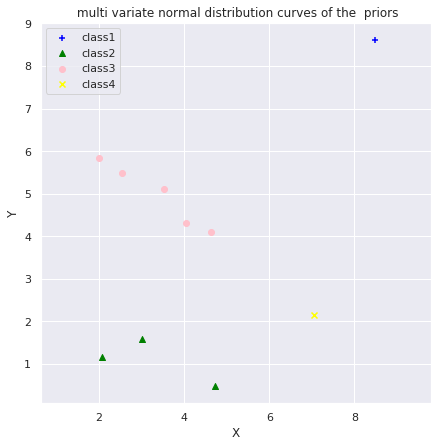

In [0]:
n_types=4
p=[0.15,0.25,0.4,0.2]
size=[10,100,1000,10000]
x=[]
for i in range(0,4):
  x.append(samplegenerator(size[i],p))

given_data=[10,100,1000,10000]
n_means = [[8.4, 8.2], [1.4, 1.6], [2.4, 5.4], [6.4, 2.4]]
t_covs = []
for s in range(len(n_means)):
  t_covs.append(make_spd_matrix(2))
r1=[]
r2=[]
r3=[]
r4=[]
for i in range (0,4):


  r1.append(np.random.multivariate_normal(n_means[0],t_covs[0],(x[i][0])).T)
  r2.append(np.random.multivariate_normal(n_means[1],t_covs[1],(x[i][1])).T)
  r3.append(np.random.multivariate_normal(n_means[2],t_covs[2],(x[i][2])).T)
  r4.append(np.random.multivariate_normal(n_means[3],t_covs[3],(x[i][3])).T)

plot(r1[0],r2[0],r3[0],r4[0])  



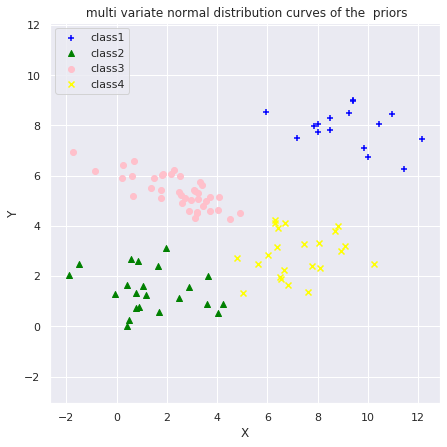

In [0]:
plot(r1[1],r2[1],r3[1],r4[1]) 

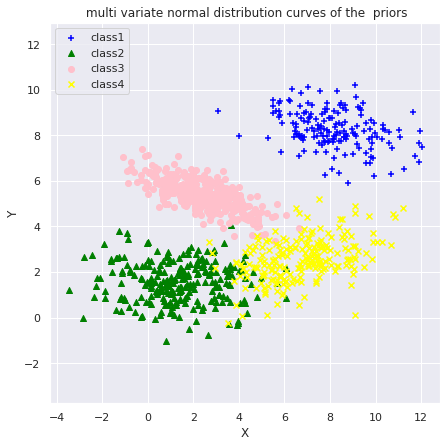

In [0]:
plot(r1[2],r2[2],r3[2],r4[2]) 

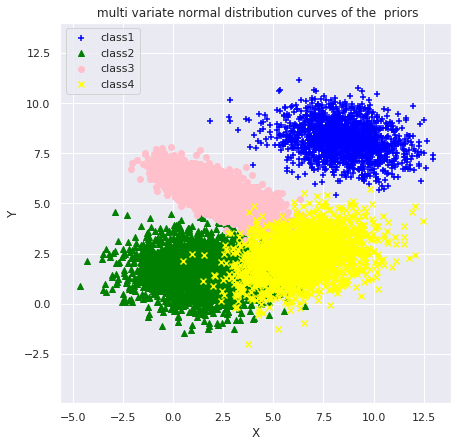

In [0]:
plot(r1[3],r2[3],r3[3],r4[3]) 

In [0]:
dp=np.concatenate((r1[0],r2[0],r3[0],r4[0]),axis=1)
k=dp.reshape(10,2)
kf = KFold(n_splits=10)
kf.get_n_splits(dp.reshape(10,2))
train_score=[]
val_score=[]
for a in range(1,7):

  train_score1=[]
  val_score1=[]
  
  for train_index, test_index in kf.split(k):
    X_train, X_test = k[train_index], k[test_index]
    
    gmm = mixture.GaussianMixture(n_components=a,
                                      covariance_type="full")
    gmm.fit(X_train)
    train_score1.append(gmm.score(X_train))
    
    val_score1.append(gmm.score(X_test))

  train_score.append(np.array(train_score1).mean())
  val_score.append(np.array(val_score1).mean())

   

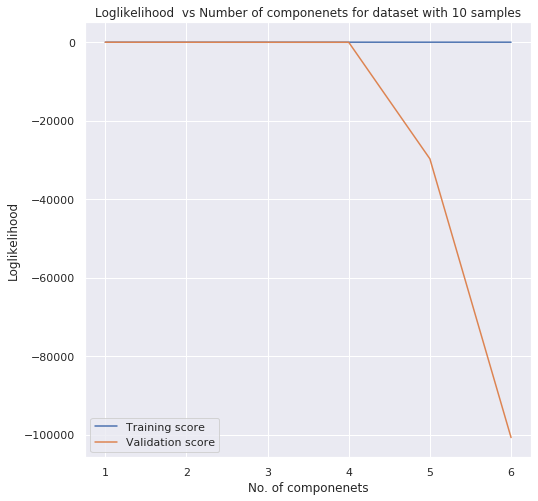

In [0]:
pp=np.arange(1,7)
plt.figure(figsize=(8,8))
plt.plot(pp,train_score,label="Training score")
plt.plot(pp,val_score,label="Validation score")
plt.title("Loglikelihood  vs Number of componenets for dataset with 10 samples")
plt.xlabel("No. of componenets")
plt.ylabel("Loglikelihood")
plt.legend()

Here when the number of samples are 10 the validation score is maximum at 5 components

In [0]:
dp=np.concatenate((r1[1],r2[1],r3[1],r4[1]),axis=1)
k=dp.reshape(100,2)
kf = KFold(n_splits=10)
kf.get_n_splits(dp.reshape(100,2))
train_score=[]
val_score=[]
for a in range(1,7):

  train_score1=[]
  val_score1=[]
  
  for train_index, test_index in kf.split(k):
    X_train, X_test = k[train_index], k[test_index]
    
    gmm = mixture.GaussianMixture(n_components=a,
                                      covariance_type="full")
    gmm.fit(X_train)
    train_score1.append(gmm.score(X_train))
    
    val_score1.append(gmm.score(X_test))

  train_score.append(np.array(train_score1).mean())
  val_score.append(np.array(val_score1).mean())

   

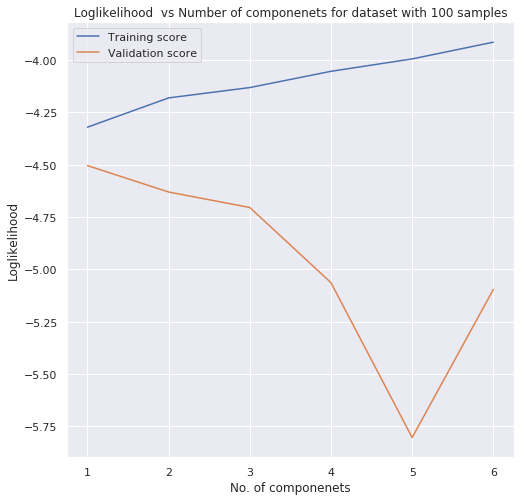

In [0]:
pp=np.arange(1,7)
plt.figure(figsize=(8,8))
plt.plot(pp,train_score,label="Training score")
plt.plot(pp,val_score,label="Validation score")
plt.title("Loglikelihood  vs Number of componenets for dataset with 100 samples")
plt.xlabel("No. of componenets")
plt.ylabel("Loglikelihood")
plt.legend()

Here when the number of samples are 100 the validation score is maximum at 4 components

In [0]:
dp=np.concatenate((r1[2],r2[2],r3[2],r4[2]),axis=1)
k=dp.reshape(1000,2)
kf = KFold(n_splits=10)
kf.get_n_splits(dp.reshape(1000,2))
train_score=[]
val_score=[]
for a in range(1,7):

  train_score1=[]
  val_score1=[]
  
  for train_index, test_index in kf.split(k):
    X_train, X_test = k[train_index], k[test_index]
    
    gmm = mixture.GaussianMixture(n_components=a,
                                      covariance_type="full")
    gmm.fit(X_train)
    train_score1.append(gmm.score(X_train))
    
    val_score1.append(gmm.score(X_test))

  train_score.append(np.array(train_score1).mean())
  val_score.append(np.array(val_score1).mean())

   

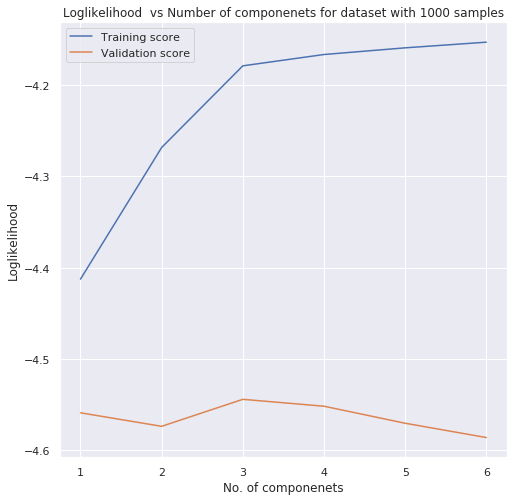

In [0]:
pp=np.arange(1,7)
plt.figure(figsize=(8,8))
plt.plot(pp,train_score,label="Training score")
plt.plot(pp,val_score,label="Validation score")
plt.title("Loglikelihood  vs Number of componenets for dataset with 1000 samples")
plt.xlabel("No. of componenets")
plt.ylabel("Loglikelihood")
plt.legend()

Here when the number of samples are 1000 the validation score is maximum at 3 components

In [0]:
dp=np.concatenate((r1[3],r2[3],r3[3],r4[3]),axis=1)
k=dp.reshape(10000,2)
kf = KFold(n_splits=10)
kf.get_n_splits(dp.reshape(10000,2))
train_score=[]
val_score=[]
for a in range(1,7):

  train_score1=[]
  val_score1=[]
  
  for train_index, test_index in kf.split(k):
    X_train, X_test = k[train_index], k[test_index]
    
    gmm = mixture.GaussianMixture(n_components=a,
                                      covariance_type="full")
    gmm.fit(X_train)
    train_score1.append(gmm.score(X_train))
    
    val_score1.append(gmm.score(X_test))

  train_score.append(np.array(train_score1).mean())
  val_score.append(np.array(val_score1).mean())

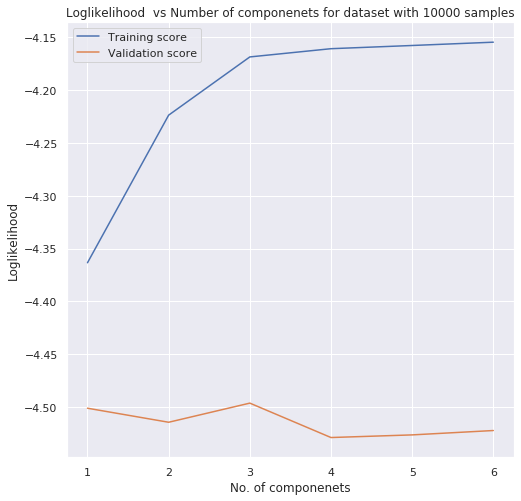

In [0]:
pp=np.arange(1,7)
plt.figure(figsize=(8,8))
plt.plot(pp,train_score,label="Training score")
plt.plot(pp,val_score,label="Validation score")
plt.title("Loglikelihood  vs Number of componenets for dataset with 10000 samples")
plt.xlabel("No. of componenets")
plt.ylabel("Loglikelihood")
plt.legend()

Here when the number of samples are 10000 the validation score is maximum at 5 components

Question2

In [0]:

from numpy.linalg import inv,pinv
from numpy.linalg import det
from numpy.linalg import norm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.covariance import empirical_covariance as ecov
from sklearn.datasets import make_spd_matrix # crating positive semidefinite matrix
from numpy import linalg as LA
%matplotlib inline


In [0]:
def samplegenerator(size,p):
  t1=0
  b=np.random.choice(2,size,p=[p[0],p[1]])
  for i in b:
    if i==1:
      t1=t1+1
  size1=[size-t1,t1]
  return size1

In [0]:
def plot(r1,r2):
  plt.figure(figsize=(9,9))
  plt.scatter(r1[0,:],r1[1,:],marker='+',label='class1',color='blue')
  plt.scatter(r2[0,:],r2[1,:],label='class2', marker = "^",color='YELLOW')
  plt.axis('equal')
  plt.title(' multi variate normal distribution curves of the  priors')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend(loc='upper left')
  plt.show()

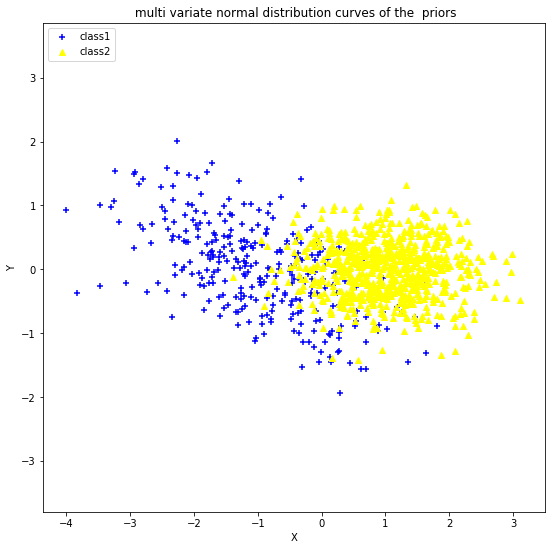

In [0]:
p=[0.3,0.7]

x=samplegenerator(999,p)

mu1=np.array([-1,0])
cov1=0.1*(np.array([[10,-4],[-4,5]]))
mu2=np.array([1,0])
cov2=0.1*(np.array([[5,0],[0,2]]))
r1= np.random.multivariate_normal(mu1,cov1,x[0]).T
r2=np.random.multivariate_normal(mu2,cov2,x[1]).T
plot(r1,r2)

In [0]:
px1=0.3
px2=0.7
sigma1=0.1*(np.array([[10,-4],[-4,5]]))
sigmainv1=np.linalg.inv(sigma1)
sigma2=0.1*(np.array([[5,0],[0,2]]))
sigmainv2=np.linalg.inv(sigma2)
W1=(-1/2)*sigmainv1
w1=sigmainv1@(mu1.reshape(2,1))
w10=(-1/2)*(mu1.reshape(2,1).T)@sigmainv1@mu1.reshape(2,1)-0.5*np.log(np.linalg.det(sigma1))+np.log(px1)
W2=-0.5*sigmainv2
w2=sigmainv2@(mu2.reshape(2,1))
w20=(-1/2)*(mu2.reshape(2,1).T)@sigmainv2@mu2.reshape(2,1)-0.5*np.log(np.linalg.det(sigma2))+np.log(px2)
g11=np.diag(r1.T@W1@r1)+w1.T@r1+w10
g12=np.diag(r2.T@W1@r2)+w1.T@r2+w10
g22=np.diag(r2.T@W2@r2)+w2.T@r2+w20
g21=np.diag(r1.T@W2@r1)+w2.T@r1+w20


In [0]:
k11=((g11>g21))
k21=((g21>g11))
k12=((g12>g22))
k22=((g22>g12))

Text(0.5, 1, 'confusion matrix')

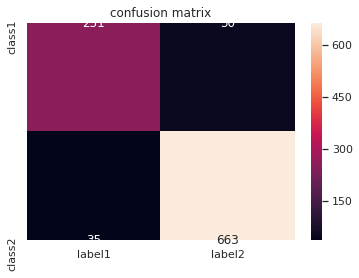

In [0]:
a=np.array([[k11.sum(),k21.sum()],[k12.sum(),k22.sum()]])
import seaborn as sns; sns.set()
data=a
col=['label1','label2']
row=['class1','class2']
ax = sns.heatmap(data,xticklabels=col,yticklabels=row,annot=True, fmt="d")
plt.title('confusion matrix')

In [0]:
confusion_matrix=np.array([['','label1','label2'],['class1',k11.sum(),k21.sum()],['class2',k12.sum(),k22.sum()]])
confusion_matrix

array([['', 'label1', 'label2'],
       ['class1', '251', '50'],
       ['class2', '35', '663']], dtype='<U6')

In [0]:
perr1=k21.sum()/(k11.sum()+k21.sum())
perr2=k12.sum()/(k12.sum()+k22.sum())
ptotalerorinmap=perr1+perr2
print("probablity of error in case of map is given by {}".format(ptotalerorinmap))

probablity of error in case of map is given by 0.21625622328627592


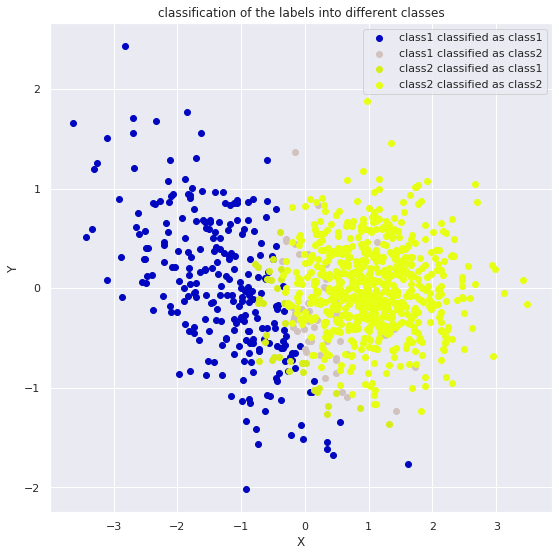

In [0]:

plt.figure(figsize=(9,9))
plt.scatter(r1[0,np.where((g11>g21))[1]], r1[1,np.where((g11>g21))[1]],label="class1 classified as class1",c='#0107C0')
plt.scatter(r1[0,np.where((g21>g11))[1]],r1[1,np.where((g21>g11))[1]],label="class1 classified as class2",c='#D2C2BD')
plt.scatter(r2[0,np.where((g12>g22))[1]],r2[1,np.where((g12>g22))[1]],label="class2 classified as class1",c='#D7ED1A')
plt.scatter(r2[0,np.where((g22>g12))[1]],r2[1,np.where((g22>g12))[1]],label="class2 classified as class2",c='#E6FF13')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')
plt.title('classification of the labels into different classes')
plt.show()

LDA

In [0]:
def plot_lda(y1,y2,threshold,r1,r2):
  y_axis=[5 for x in range(r1)]
  g_axis=[2 for x in range(r2)]
  plt.axvline(x=threshold)
  plt.plot(y1,y_axis,'*')
  plt.plot(y2,g_axis,'o')
  plt.plot()

In [0]:
def Error(check,p_err):
  plt.plot(check,p_err,color='red')
  plt.title(" error vs X")

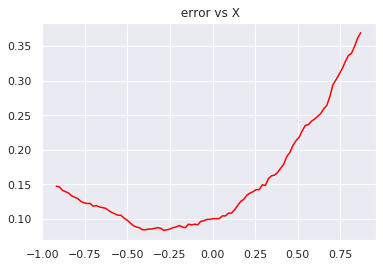

In [0]:
mean1=np.array([np.mean(r1[0,:].T),np.mean(r1[1,:].T)])
mean1=mean1.reshape(-1,1)
mean2=np.array([np.mean(r2[0,:].T),np.mean(r2[1,:].T)])
mean2=mean2.reshape(-1,1)
s_b=(mean1-mean2)@(mean1-mean2).T
#rom sklearn.covariance import empirical_covariance as ecov
s_w=(np.cov(r1)*0.5)+(np.cov(r2)*0.5)
h=inv(s_w)@s_b
w,v=np.linalg.eig(h)
w=v[:,np.argmax(np.array(w))]
y1=w.T@r1
y2=w.T@r2
y1.mean(),y2.mean()
minx=y1.mean() if y1.mean()<= y2.mean() else y2.mean()
maxx=y1.mean() if y1.mean()>= y2.mean() else y2.mean()
check=np.linspace(minx,maxx,100)
p_err=[]
y1=np.array(y1)
y2=np.array(y2)
for i in (check):
  l1_1=y1[y1<=i]
  l1_2=y1[y1>i]
  l2_2=y2[y2>=i]
  l2_1=y2[y2<i]
  p_err.append((len(l1_2)+len(l2_1))/999)
  

Error(check,p_err)


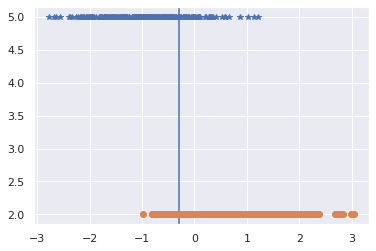

In [0]:
i=np.argmin(np.array(p_err)) 
threshold=check[i]
 # minimum threshold values
plot_lda(y1,y2,threshold,r1.shape[1],r2.shape[1])

In [0]:

count1=0
for i in range(len(y1)):
 
  if(y1[i]>threshold):
    count1=count1+1
count=0
for i in range(len(y2)):
  if(y2[i]<threshold):
    count=count+1
perr1=count1/len(y1)
perr2=count/len(y2)
ptotal=perr1+perr2
print("probability of error in the case of LDA is {}".format(ptotal))


probability of error in the case of LDA is 0.21528048815314757


In [0]:
len(y1)

301

In [0]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [0]:
a=(np.zeros(r1.shape[1])).reshape(r1.shape[1],1)

d=(np.zeros(r2.shape[1])).reshape(r2.shape[1],1)
d.shape

(698, 1)

In [0]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(r1.T,a , test_size=0.1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(r2.T,d , test_size=0.1)

X_train=np.vstack((X_train1,X_train2))
X_test=np.vstack((X_test1,X_test2))
y_train=np.vstack((y_train1,y_train2))
y_test=np.vstack((y_test1,y_test2))

In [0]:

X_tr_arr = X_train
X_ts_arr = X_test
y_tr_arr = y_train
y_ts_arr = y_test

logistic regression

In [0]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b


In [0]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(result))
    return final_result



In [0]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost


In [0]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w + (learning_rate * (dw.T))
        b = b + (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs


In [0]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [0]:
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)
#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0001,no_iterations=4500)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)
#
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))
#
y_ts_pred = predict(final_test_pred, m_ts)
print('probability of error in the case of the logistic function is ',1-accuracy_score(y_ts_pred.T, y_ts_arr))

Number of Features 2
Optimized weights [[ 0.07500343 -0.00363884]]
Optimized intercept 0.21119976634039278
Training Accuracy 0.9899777282850779
probability of error in the case of the logistic function is  0.01980198019801982


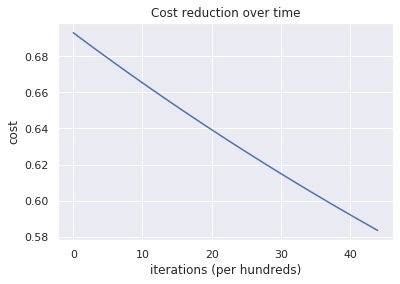

In [0]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()


As the number of iterations increase the cost reduces and gives us better results in the case of gradient ascent